# 구별 소득세와 맛집 가격대점수 비교

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import pearsonr


In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [55]:
df = pd.read_csv('./data/맛집가격점수.csv')
df = df.drop('Unnamed: 0', axis=1)
df.tail()

,구,10000원 미만,20000원 미만,30000원 미만,40000원 미만,40000원 이상,맛집수,가격 점수
20,양천구,2,1,0,1,0,4,2.000000
21,영등포구,16,15,2,1,4,38,2.000000
22,은평구,6,3,0,0,1,10,1.700000
23,종로구,31,23,6,1,5,66,1.878788
24,중랑구,2,1,0,0,0,3,1.333333


In [64]:
test2 = df[['구','가격 점수']]
test2.head()

,구,가격 점수
0,도봉구,1.300000
1,노원구,2.166667
2,강북구,1.250000
3,은평구,1.700000
4,종로구,1.878788


In [65]:
income_tax = pd.read_csv('./data/구별 소득세.csv')
income_tax.drop('Unnamed: 0', axis=1,inplace=True)
income_tax.head()

,구,소득세
0,도봉구,227929
1,노원구,404969
2,강북구,146936
3,은평구,413900
4,종로구,3169471


In [66]:
li = []
for i in range(0,25) :
    a = test2['구'][i].replace(' ','')
    li.append(a)
# li
test2['구']= li
test2.tail()

C:\Users\skvis\AppData\Local\Temp\ipykernel_26052\2730004657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['구']= li


,구,가격 점수
20,동작구,1.809524
21,서초구,2.276923
22,관악구,1.333333
23,금천구,2.000000
24,구로구,2.000000


In [67]:
df = pd.merge(income_tax,test2, on='구')
df

,구,소득세,가격 점수
0,도봉구,227929,1.300000
1,노원구,404969,2.166667
2,강북구,146936,1.250000
3,은평구,413900,1.700000
4,종로구,3169471,1.878788
5,성북구,863338,1.600000
6,동대문구,523330,1.500000
7,중랑구,259445,1.333333
8,서대문구,715787,1.755556
9,마포구,1427778,2.013699


In [9]:
df.to_csv('./data/소득세와맛집가격점수.csv')

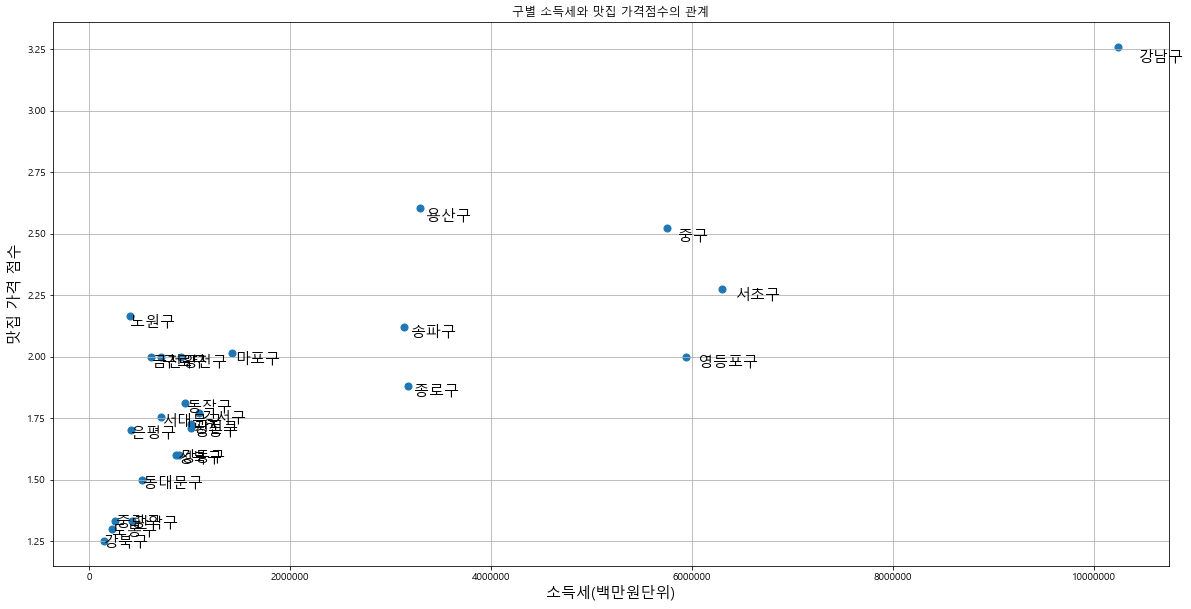

In [68]:
fp1 = np.polyfit(df['소득세'], df['가격 점수'],1)
fp1

f1 = np.poly1d(fp1)



plt.figure(figsize=(20,10))
plt.scatter(df['소득세'], df['가격 점수'], s=50)


for n in range(25):
    plt.text(df['소득세'][n]*1.02, df['가격 점수'][n]*0.98, 
             df.loc[n, '구'], fontsize=15)   
plt.title("구별 소득세와 맛집 가격점수의 관계")   
plt.xlabel('소득세(백만원단위)',fontsize=15)
plt.ylabel('맛집 가격 점수',fontsize=15)
plt.ticklabel_format(axis='x',useOffset=False, style='plain')

plt.grid()
plt.show()

In [63]:
print(pearsonr(df['소득세'], df['가격 점수']))

(0.8102921219978414, 9.143644894293959e-07)
